# OCSMM-SHAP 
## Student grades at school level - Synthetic dataset

In [38]:
import pandas as pd
import numpy as np

# Configuration
n_schools = 30
n_students_per_school = 100  # 100 students per school
subjects = ["Math", "Physics", "History", "English", "Geography", 
            "Art", "Music", "PE", "Chemistry", "Biology"]
n_subjects = 10
np.random.seed(42)
dataset = []

In [ ]:
for school_id in range(n_schools):
    school_grades = np.zeros((n_students_per_school, n_subjects))
    
    # Normal schools
    base_params = np.array([
        [75, 5],   # Math
        [80, 4],   # Physics
        [70, 8],   # History
        [72, 6],   # English
        [68, 7],   # Geography
        [85, 3],   # Art
        [88, 2],   # Music
        [90, 1],   # PE
        [78, 5],   # Chemistry
        [77, 5]    # Biology
    ])
    # Add this after generating the main 29 groups

for school_id in range(n_schools-1):
    school_grades = np.zeros((n_students_per_school, n_subjects))
    for subj_idx in range(n_subjects):
        mean, std = base_params[subj_idx]
        grades = np.random.normal(mean, std, n_students_per_school)
        school_grades[:, subj_idx] = np.clip(grades, 0, 100).astype(int)
    dataset.append(school_grades)


group_29 = np.zeros((n_students_per_school, n_subjects))

# Create the strong interaction between Art (5) and History (2)
art_idx = subjects.index("Art")
history_idx = subjects.index("History")

art_scores = np.random.normal(85, 1.5, n_students_per_school)
history_scores = (art_scores - 85) ** 2 + np.random.normal(0, 0.3, n_students_per_school)  # strong nonlinear interaction

for subj_idx in range(n_subjects):
    if subj_idx == art_idx:
        group_29[:, subj_idx] = np.clip(art_scores, 0, 100).astype(int)
    elif subj_idx == history_idx:
        group_29[:, subj_idx] = np.clip(history_scores, 0, 100).astype(int)
    else:
        mean, std = base_params[subj_idx]
        group_29[:, subj_idx] = np.clip(
            np.random.normal(mean, 1.5, n_students), 0, 100
        ).astype(int)


In [40]:
# # Anomaly 1: Art grades (column 5) much lower
# dataset[29][:, 5] = np.random.randint(20, 40, size=n_students_per_school)

# # Anomaly 2: Physics grades (column 1) higher with outliers
# physics_grades = np.random.normal(95, 15, n_students_per_school)
# dataset[29][:, 1] = np.clip(physics_grades, 0, 100).astype(int)

In [41]:
# art_grades =  np.random.normal(85, 15, n_students_per_school)
# dataset[29][:, 5] = np.clip(art_grades, 0, 100).astype(int)

# physics_grades = np.random.normal(80, 15, n_students_per_school)
# dataset[29][:, 1] = np.clip(physics_grades, 0, 100).astype(int)

In [42]:
len(dataset)

30

In [43]:
dataset

[array([[ 77.,  74.,  72.,  67.,  56.,  87.,  89.,  89.,  82.,  78.],
        [ 74.,  78.,  74.,  68.,  63.,  90.,  86.,  91.,  75.,  75.],
        [ 78.,  78.,  78.,  76.,  68.,  80.,  89.,  89.,  78.,  77.],
        [ 82.,  76.,  78.,  75.,  68.,  86.,  90.,  88.,  75.,  83.],
        [ 73.,  79.,  58.,  71.,  64.,  83.,  88.,  88.,  75.,  77.],
        [ 73.,  81.,  62.,  72.,  72.,  83.,  91.,  90.,  76.,  77.],
        [ 82.,  87.,  74.,  79.,  60.,  83.,  86.,  88.,  79.,  70.],
        [ 78.,  80.,  74.,  68.,  67.,  82.,  85.,  91.,  75.,  80.],
        [ 72.,  81.,  74.,  75.,  68.,  85.,  84.,  87.,  84.,  80.],
        [ 77.,  79., 100.,  70.,  71.,  82.,  90.,  91.,  73.,  87.],
        [ 72.,  72.,  74.,  70.,  72.,  85.,  89.,  90.,  77.,  75.],
        [ 72.,  79.,  79.,  78.,  60.,  84.,  87.,  89.,  75.,  78.],
        [ 76.,  80.,  77.,  76.,  57.,  84.,  88.,  89.,  85.,  78.],
        [ 65.,  89.,  75.,  76.,  76.,  82.,  85.,  90.,  78.,  84.],
        [ 66.,  79.,

In [44]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [52]:
classifier = OneClassSMMClassifier(nu=0.35)

In [53]:
classifier.fit(dataset[:29])

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [54]:
decision, y_pred = classifier.predict(dataset)

Calculating kappa.

calculating rho.

0.9504619166876059


In [55]:
decision

array([ 0.00041802, -0.00403607,  0.00977781,  0.00136233,  0.00593012,
        0.00394936,  0.00165594,  0.00136367,  0.00341101,  0.00218469,
        0.00987338,  0.00136236,  0.00413247,  0.00136212,  0.002759  ,
        0.00130839,  0.00482262,  0.00051933,  0.00451407,  0.00265781,
        0.00136188,  0.00355168, -0.01025528,  0.00136234,  0.00136219,
        0.00495905,  0.00136307,  0.00215783, -0.00051031,  0.00417508])

In [18]:
y_pred = np.sign(decision)

In [19]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.])

In [20]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[30]

In [23]:
from src.explanation_algorithms.OCSMMSHAP_copy import KernelSHAPIQ

shapiq = KernelSHAPIQ(n=n_subjects, max_order=2)
interactions_per_group = shapiq.explain_single_group(
    group_data=dataset[30],
    X_train=dataset,  
    model=classifier,
    regularization=1e-6)

100%|██████████| 1024/1024 [00:04<00:00, 213.81it/s]


1024
[ 0.09999988  0.0060553   0.00265639  0.00930389  0.00398543  0.00664871
  0.00743314 -0.00040404  0.00360695  0.00328505  0.00405643 -0.00019908
 -0.00769263 -0.00169569 -0.00470019 -0.00557225  0.00316338 -0.00157659
 -0.00113735 -0.0018202  -0.00380299  0.00232629 -0.0009342  -0.00170631
  0.00516841 -0.00038608  0.00302265  0.00207496 -0.00535669 -0.00835597
 -0.00924233 -0.00022177 -0.00459747 -0.00452075 -0.00540159 -0.00238029
 -0.0031872   0.00581046 -0.00051959  0.00144217  0.00044072 -0.00625239
  0.00198947 -0.00231628 -0.00158427 -0.00241331  0.00156177 -0.00355281
 -0.00249026 -0.00336183 -0.00080293  0.00427993  0.0053473   0.000685
 -0.00153754  0.00125618]


In [24]:
interactions_per_group.dict_values

{(): 0.09999988070284493,
 (0,): 0.006055300734840264,
 (1,): 0.0026563891951256807,
 (2,): 0.009303893245524353,
 (3,): 0.003985429837298631,
 (4,): 0.006648707141291406,
 (5,): 0.00743314151943853,
 (6,): -0.0004040356414923294,
 (7,): 0.003606954217532635,
 (8,): 0.00328505188284254,
 (9,): 0.004056432405544663,
 (0, 1): -0.00019908327839546317,
 (0, 2): -0.007692633987241762,
 (0, 3): -0.0016956872230667658,
 (0, 4): -0.004700192764666861,
 (0, 5): -0.00557225159695436,
 (0, 6): 0.0031633843565863915,
 (0, 7): -0.0015765937853242443,
 (0, 8): -0.0011373470404307973,
 (0, 9): -0.0018202008726304509,
 (1, 2): -0.0038029939899829907,
 (1, 3): 0.0023262903182345424,
 (1, 4): -0.0009341964500053379,
 (1, 5): -0.0017063104851197126,
 (1, 6): 0.005168405627133823,
 (1, 7): -0.0003860807429567713,
 (1, 8): 0.003022648944698139,
 (1, 9): 0.0020749615335622722,
 (2, 3): -0.005356690943152254,
 (2, 4): -0.008355966439924369,
 (2, 5): -0.009242331291555264,
 (2, 6): -0.00022177093728508994,
 (

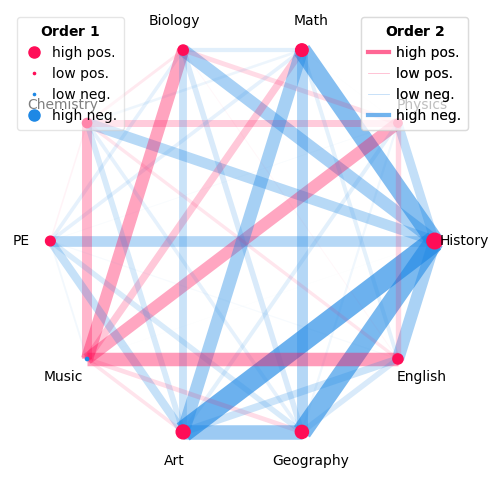

In [25]:
interactions_per_group.plot_network(feature_names=subjects, show=True)

In [19]:
shapley_values, base = ocsmm_shap.return_deterministic_shapley_values()

In [26]:
decision[29]

np.float64(-9.342443046354813)

In [33]:
sum = shapley_values.T[29].sum()
sum

tensor(-14.3765)

In [27]:
base, phi1, phi2_list = ocsmm_shap.compute_interaction_shapley_values_concise()


DEBUG: phi_main shape: torch.Size([10, 30]), dtype: torch.float32
DEBUG: baseline_values shape: torch.Size([30]), dtype: torch.float32
DEBUG: residuals_after_main_effects shape: torch.Size([1024, 30]), dtype: torch.float32
DEBUG: X_2 shape: torch.Size([1024, 45])
DEBUG: W_2_values (sample): tensor([1.0000e+09, 1.0000e+09, 1.0000e+09, 1.0000e+00, 1.0000e+09]), shape: torch.Size([1024])
DEBUG: X2tY2_tilde shape: torch.Size([45, 30])
DEBUG: X2tX2_tilde_reg shape: torch.Size([45, 45])
DEBUG: phi_2_vector shape: torch.Size([45, 30]), dtype: torch.float32


In [30]:
phi2_list[29][0][1]

tensor(0.3291)

In [32]:
base[29] + sum 

tensor(-9.3341)

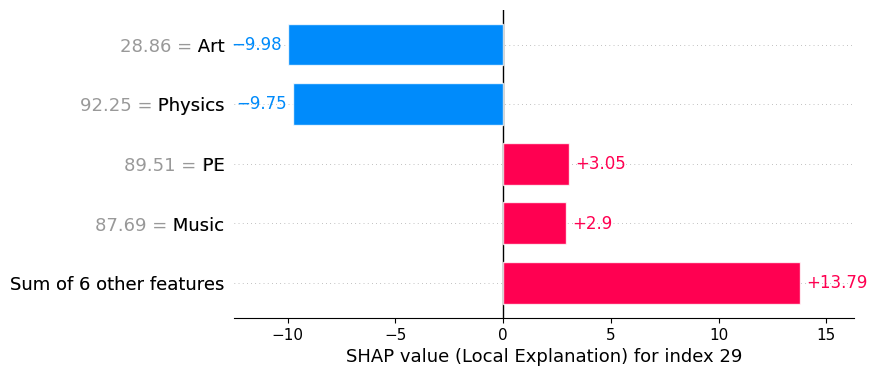

In [18]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm, summary_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T.numpy(), 29, feature_names=subjects, datasets=dataset)

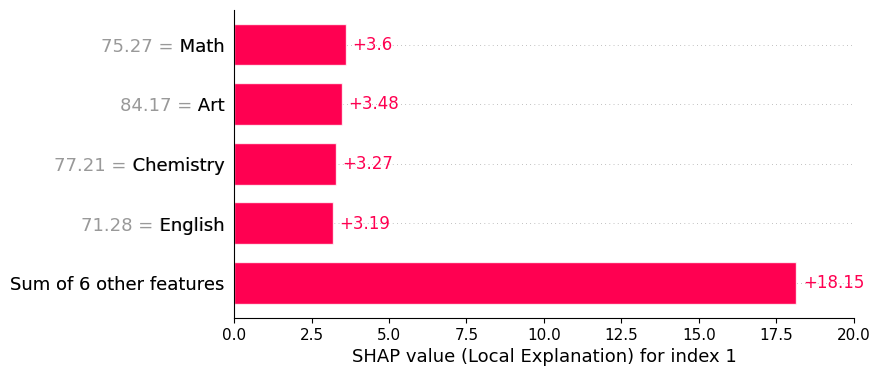

In [19]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 1, feature_names=subjects, datasets=dataset)

/tmp/ipykernel_19366/4265259750.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


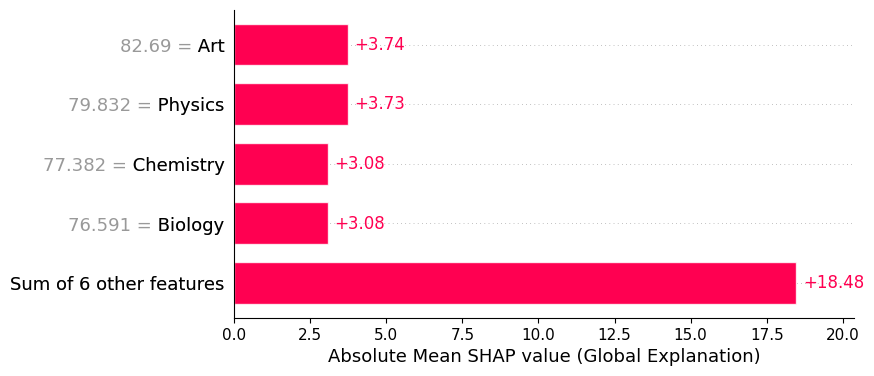

In [20]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values.numpy(), feature_names=subjects, datasets=dataset)

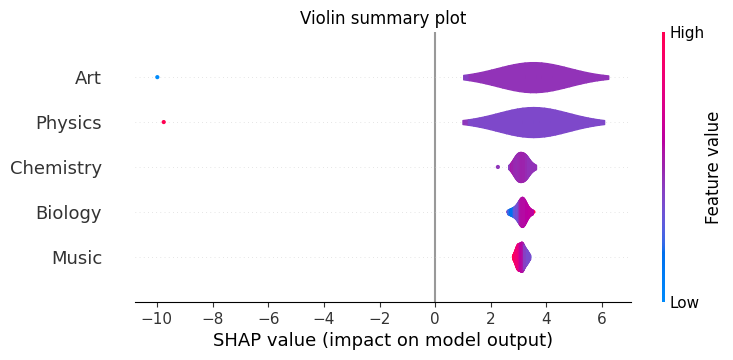

In [21]:
summary_plot_ocsmm(shapley_values.T.numpy(), feature_names=subjects, datasets=dataset)

In [22]:
interactions = ocsmm_shap.compute_interaction_shapley_values_concise()

In [23]:
min_result = min(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])
min_result

(29, -0.7821201086044312)

In [24]:
max_result = max(enumerate(m[0, 1].item() for m in interactions), key=lambda x: x[1])
max_result

(25, 0.9053809642791748)

In [25]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network

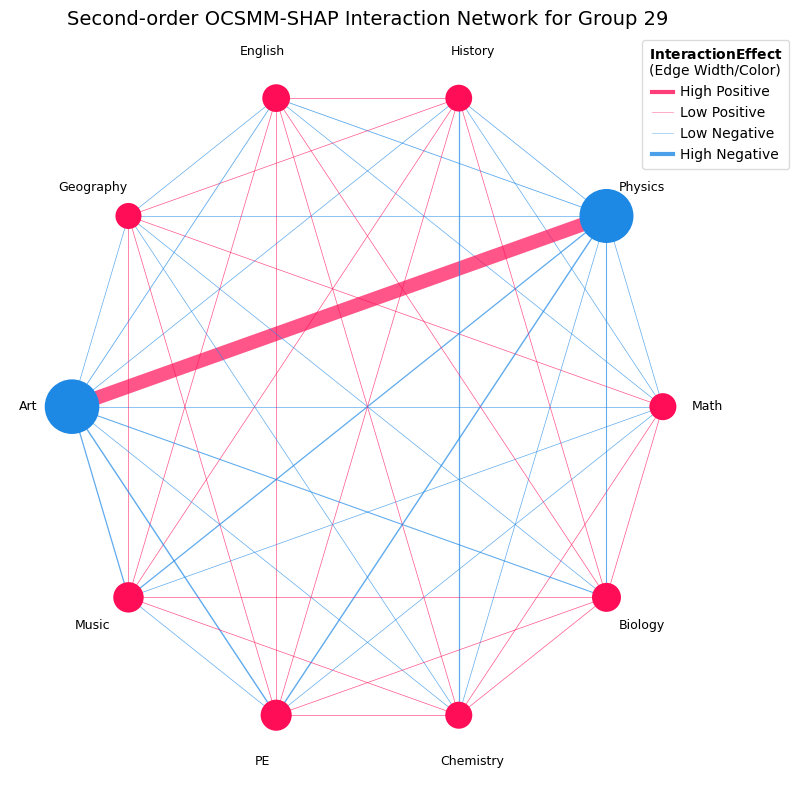

In [26]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[29],
        interaction_matrix_group=interactions[29],
        feature_names=subjects,
        group_id="29"
    )

In [31]:
from src.explanation_algorithms.OCSMM_interaction import OCSMMSHAP
ocsmm_exp = OCSMMSHAP(X=dataset, classifier=classifier, decision=decision)

In [32]:
ocsmm_exp.fit(dataset, 2**dataset[0].shape[1])

Calculating value functions v(S):   0%|          | 0/1023 [00:00<?, ?it/s]

Calculating value functions v(S): 100%|██████████| 1023/1023 [00:08<00:00, 125.30it/s]


OCSMM-SHAP fitting complete.


In [33]:
shapley_dict = ocsmm_exp.compute_shapley_values_dict()

Calculating main effects (phi_1)...
Calculating residuals for interactions...
Calculating interaction effects (phi_2)...
Assembling output dictionaries...
Shapley value dictionary computation complete.


In [35]:
shapley_dict[29]

{(): 30.793743133544922,
 (0,): 2.2504897117614746,
 (1,): -9.752904891967773,
 (2,): 2.211686611175537,
 (3,): 2.377558946609497,
 (4,): 2.073377847671509,
 (5,): -9.983898162841797,
 (6,): 2.909353017807007,
 (7,): 3.044381618499756,
 (8,): 2.248178720474243,
 (9,): 2.6237008571624756,
 (0, 1): -0.8165514469146729,
 (0, 2): -0.06355022639036179,
 (0, 3): -0.5204272270202637,
 (0, 4): 0.23643043637275696,
 (0, 5): -0.8159846663475037,
 (0, 6): -0.038597989827394485,
 (0, 7): -0.039545271545648575,
 (0, 8): 0.49095067381858826,
 (0, 9): 0.0270756334066391,
 (1, 2): -0.912205696105957,
 (1, 3): -1.0615938901901245,
 (1, 4): -0.7268368601799011,
 (1, 5): 17.467538833618164,
 (1, 6): -1.5904070138931274,
 (1, 7): -1.7757574319839478,
 (1, 8): -0.8779115080833435,
 (1, 9): -1.3365504741668701,
 (2, 3): 0.023641739040613174,
 (2, 4): 0.2143130749464035,
 (2, 5): -0.9022924304008484,
 (2, 6): 0.6720600128173828,
 (2, 7): 0.4909241795539856,
 (2, 8): -1.5841660499572754,
 (2, 9): 0.6015915870